## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [4]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

## Print count of each label in Purchased column

In [5]:
X.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

## Print Correlation of each feature in the dataset

In [6]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train the model with random_state = 0

In [8]:
lr = LogisticRegression(random_state=0)

In [9]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Print the prediction results

In [10]:
prediction = lr.predict(X_test)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Create dataframe with the Actual Purchased and Predict Purchased

In [11]:
comb = X_test

In [12]:
comb["Actual_Purchased"] = (y_test)
comb['predict']= prediction

In [13]:
comb

,Age,EstimatedSalary,Actual_Purchased,predict
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [14]:
print(f"True \t {confusion_matrix(y_test,prediction)[0][0]}")
print(f"False \t {confusion_matrix(y_test,prediction)[1][0]}")

True 	 68
False 	 32


## Print Confusion Matrix and classification_report

In [15]:
confusion = confusion_matrix(y_test,prediction)
print(confusion)

[[68  0]
 [32  0]]


In [16]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



Text(20.72222222222222, 0.5, 'True label')

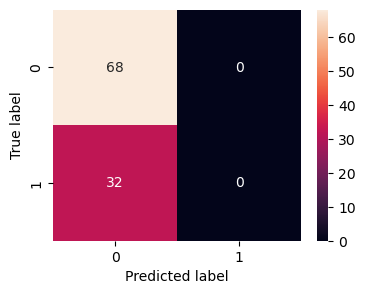

In [17]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

## Use StandardScaler() to improved performance and re-train your model

In [18]:
X_test = X_test.drop(["Actual_Purchased", "predict"], axis=1)

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
prediction = lr.predict(X_test)

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [23]:
print(lr.predict(np.array([[30,90000]])))

[1]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [24]:
print(lr.predict(np.array([[40,90000]])))

[1]
